<a href="https://colab.research.google.com/github/Yogesh-46/Hotel_Booking_Analysis_EDA/blob/main/Hotel_Booking_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/EDA - Hotel Bookings Analysis/Hotel Bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Lets dive-into the data and also check its sanity.

In [ ]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# Columns info:

1. Hotel : Type/Category of Hotel 
 So, we have two types or categories of hotel, namely '**City Hotels**' & '**Resorts**'

2. is_canceled : Has **boolean** values 0 for not cancelled and 1 for cancelled bookings. 

3. lead_time : As limited info is available about it, our best guess is that it gives the difference between booking date and arrival date in no of days unit.

4. arrival_date_year: year of arrival ,type=int, three values: **2015,2016,2017**

5. arrival_date_month: month of arrival: type= object
 Its a **categorical** type of variable with 12 unique values 

6. arrival_date_week_number: week_number for the year, type=int , range:** 1 to 53**

7. arrival_date_days_of_the_month: day of the month for arrival, type= int, range: **1 to 31**

8. stays_in_weekend_night :  stays in no of weekend nights, type =int

9. stays_in_week_night :  stays in no of nights in weekdays, type =int

10. adults : no of adults for the stay, type=int
  we have atleast one **zero value for adult**, lets check it later

11. children : no. of childrens for the stay, type=float,
 type must be **converted into int**
 we have four null values, we dont know if null corresponds to zero children or not, so we can either drop these 4 rows or we can replace null values with something.

12. babies : no. of babies for the stay, type = int

13. meal : categorical variable, type of meal opted for the stay
  It has 5 types of meal:-  BB: Breakfast & bed, HB: half-board,Breakfast and dinner, FB: full-board, breakfast, lunch & dinner, SC: self-catering, no meals
and we also have Undefined: which probably states that none of this was opted by costumer while booking.

14. country : location as in country , name of country is stored as commonly recognized **3-letter country codes**.It has 177 countries.
There are some null values

15. market_segment: market segment categories

16. distribution_channel :** five **distrubation channels based on booking

17. is_repeated_guest : **boolean** variable , o for non-repeated and 1 for repeated guest.

18. previous_cancellations : no of previous cancellations , type=int

19. previous_bookings_not_canceled : no of previous non-cancelled bookings, type=int

20. reserved_room_type : type of room as per booking

21. assigned_room_type : type of room actually assigned

22. booking_changes : no of changes done in booking by customer, type=int

23. deposit_type : three categories :- **refundable, non-refundable, no deposit**

24. agent : agent throught which booking was made, type = float, value most likely corresponds to id of agent. Has some null values, these value either indicate that booking was not done via any agent or that data was unavailable

25. company :company throught which booking was made, type = float, value most likely corresponds to id of company. Has some null values, these value either indicate that booking was not done via any company or that data was unavailable

26. days_in_waiting_list : no of days hotel management took to confirm booking

27. customer_type : four types of customers

28. adr : **average daily rate** for the hotel.

29. required_car_parking_spaces: no of car parking spaces required by customer

30. total_of_special_request : total no of special requests 

31. reservation_status : **three** status, namely check-out, cancelled, no-show

32. reservation_status_date : date on which reservation status was updated 

# Checking for null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# This looks great as we dont have much null values, except for 4 out of 32 columns.
 Lets check perc of null values.

In [ ]:
#Check how many cells are missing from our dataset

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#We can see that we have 4 columns with missing values
#Lets check these values as percentages.

df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
# So we have 4 rows with null values for childrens. So , we can either remove these 4 rows or we can replace values with mean/mode of the children column.
# Looking at the data , the mode is 0, so we will replace null values with mode.This make more sense here because counts of 0 (i.e. mode) is very high compared to other values
mode_children = df['children'].mode()[0]
mode_children

0.0

In [ ]:
df.loc[df['children'].isna(),'children'] = mode_children

In [ ]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

# We can see here the the dtype of chidren column is float, so lets convert it to int

In [ ]:
df['children'] = df['children'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# When we look at adr (average daily rate) data, the minimum value is negative, which doesnt make sense

In [ ]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


# So we will assume this as a typing error and chnage it to positive

In [ ]:
df.loc[df['adr']<0,'adr'] = - df.loc[df['adr']<0,'adr']

In [ ]:
df.loc[14969,'adr']

6.38

# Columns agent and company also have float dtype but all values are in integers.
Also, these columns corresponds to id of agents and companies used by customer for bookings. 
Both of these columns have high percentage of missing values and as these columns are not much of use, we can  drop these columns

In [ ]:
df.drop(['agent','company'],axis=1,inplace=True) 

# The column adult as well as children have min value zero, so lets check it 

In [ ]:
df[df['adults']==0][df['children']==0][df['babies']==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


# These 180 rows doesnt make any sense as visitors is zero for the stay, so we can either drop these rows right now or we can assume that values area manual error and ignore for now for analysis which are not related with type or number of visitors. While fo such comparison, we will drop these rows. 

# The column country has name of country in 3 letter code, it has 177 unique values and some null values. Its possible that the hotel management doesnt have the data regading visitor's origin country, so these values are acceptable. We can keep these values for now but need to drop for comparing countries for num of visitors

# Looking at the outliers

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831228,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535575,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

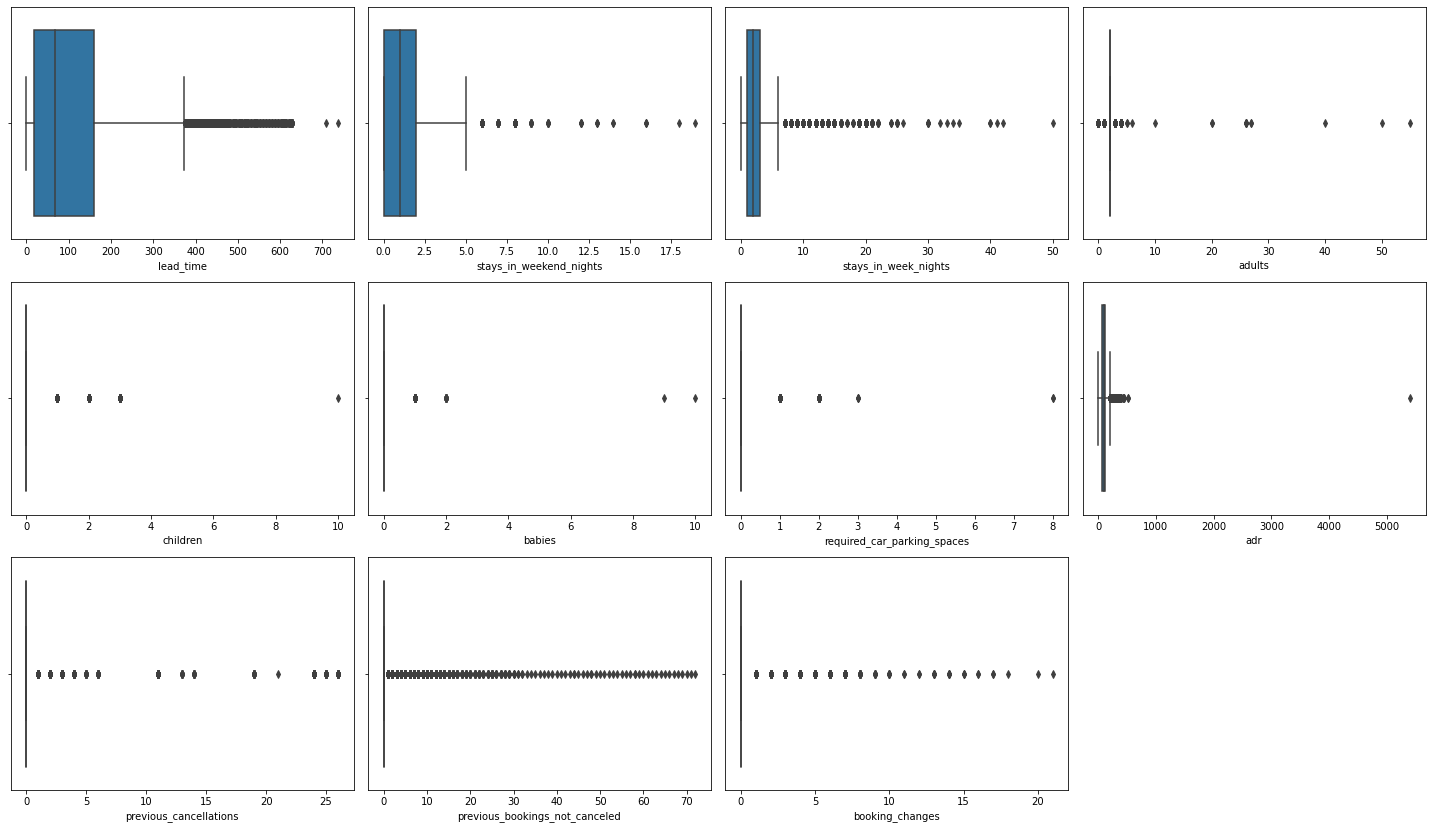

In [ ]:
#Here we can see some outliers.
#Lets build boxplots to see it better.

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

# Hotel vs Resort 

# Total cancelled vs non-cancelled booking

# Cancelled vs non-cancelled booking for hotel and resort

In [ ]:
# Now, we will use only non-cancelled bookings for further study
# So removing cancelled bookings

# Year wise total bookings and also hotel,resort vise dividing

# Lets find the bussiest months

# Lets find maximum visitors are from which countries.
Removing the null values for country

# Lets compare ype of visitors
First remove the rows with zero total visitors(180 rows)

Dividing into three categories:Solo,Couple,Family/Friends

For two adult visitors without children/babies , we will treat as a couple

For many than 2 visitors, it can either be family or group of friends

In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

# How long do people stay?
overall and hotel type-wise

# New Section

# New Section